In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from numpy import arange
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

# Data Visualization

In [2]:
df=pd.read_csv("arrhythmia.data")

In [3]:
df

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.3,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


There does exist no header let's add one

In [4]:
columnnames=[]
i=0
for i in range (280):
    columnnames.append(i)
    i=i+1

In [5]:
df.columns=columnnames

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


Let's check for null values

In [7]:
df.isnull().sum().sum()

0

This is not true in the document they stated that nan values are named as '?'

In [8]:
df=df.set_index([df.index]).replace('?',np.nan)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [10]:
df.isnull().sum().sum()

407

Let's replace the null values by the mean of the columns


In [11]:
df=df.fillna(df.mean())

In [12]:
df.isnull().sum().sum()

407

In [13]:
df[10].isnull().sum().sum()

8

In [14]:
df[11].isnull().sum().sum()

22

In [15]:
df[12].isnull().sum().sum()

1

In [16]:
df[13].isnull().sum().sum()

375

Column 13 will be deleted since there are 375 null value out of 451 value in the columns which makes it a corrupted columns

In [17]:
df[14].isnull().sum().sum()

1

In [18]:
df=df.drop(columns=[13])

Nothing has changed let's see why

In [19]:
df[df.columns[df.isna().any()]]

,10,11,12,14
0,37,-17,31,53
1,34,70,66,75
2,11,-5,20,71
3,13,61,3,NaN
4,66,52,88,84
...,...,...,...,...
446,4,40,-27,63
447,66,52,79,73
448,-19,-61,-70,84
449,29,-22,43,80


Let's explore what is the problem

In [20]:
df[10]

0       37
1       34
2       11
3       13
4       66
      ... 
446      4
447     66
448    -19
449     29
450     79
Name: 10, Length: 451, dtype: object

Note that the dtype  is object let's make sure that all the columns in the dataframe are numeric

In [21]:
df = df.apply(pd.to_numeric)

In [22]:
df=df.fillna(df.mean())

In [23]:
df.isnull().sum().sum()

0

Problem solved :)

Let's check for duplicates

In [24]:
df.drop_duplicates(keep='first', inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


There are no duplicates :)

Let's check for outliers

In [25]:
classes=df[279].value_counts()
print(classes)

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       1
Name: 279, dtype: int64


Weights of classes

weight= no_sample/(no_classes*ClassSample)

1:0.115, , 2:0.64, 3:1.879, 4:1.879, 5:2.168, 6:1.128,7:9.396, 8:28.188, 9:3.132,10:0.564, 14:7.047, 15:5.638, 16:1.281 
                                                          
                                                                                                           
                                                       
                                                    

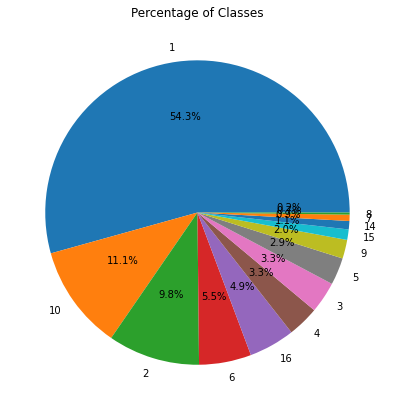

In [26]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)
classeslabels = [1,10,2,6,16,4,3,5,9,15,14,7,8]
fig = plt.figure(figsize =(10, 7))
plt.pie(classes,autopct = lambda pct: func(pct, classes),labels = classeslabels)  
plt.title ("Percentage of Classes")
plt.show() 

# Scaling the data

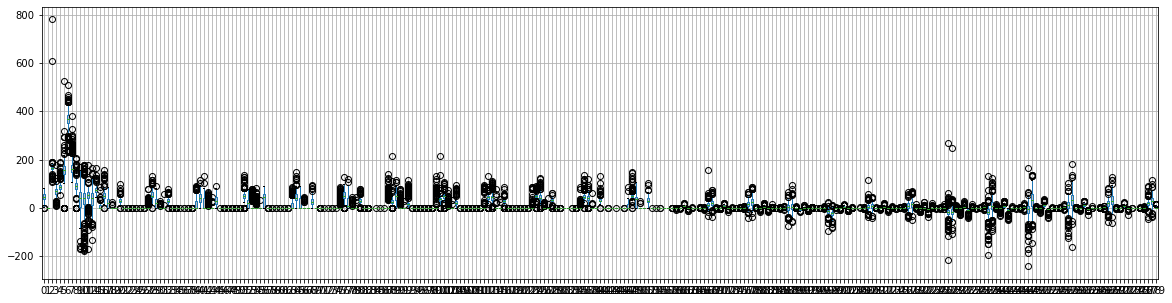

In [27]:
fig = plt.figure(figsize =(20, 5))
df.boxplot()
plt.show()

Let's standardize the outliers 

In [28]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)
scaled_df

array([[ 5.84464972e-01,  9.00691390e-01, -3.05558949e-02, ...,
         8.01848022e-02,  5.07359248e-01,  4.83463980e-01],
       [ 4.62600107e-01, -1.11025820e+00,  1.57852230e-01, ...,
        -5.19698673e-01,  1.05960448e+00,  1.39197338e+00],
       [ 5.23532540e-01, -1.11025820e+00,  2.38598570e-01, ...,
         1.13183238e+00,  1.74178976e+00, -6.52172764e-01],
       ...,
       [-6.34183675e-01, -1.11025820e+00, -3.64044842e-03, ...,
        -4.70407106e+00, -3.39084237e+00, -4.25045416e-01],
       [-8.77913405e-01,  9.00691390e-01, -2.99710360e-01, ...,
         4.20859368e-01,  9.29664423e-01, -6.52172764e-01],
       [ 1.92497848e+00,  9.00691390e-01, -1.65133127e-01, ...,
         1.46838522e-01,  1.82509113e-01, -6.52172764e-01]])

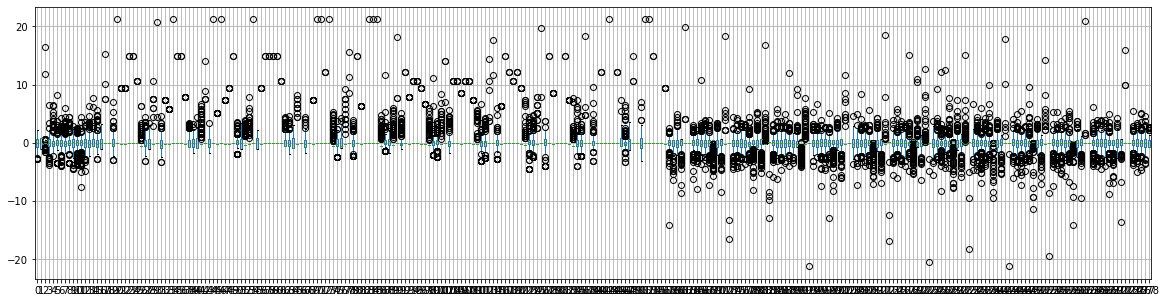

In [29]:
fig = plt.figure(figsize =(20, 5))
scaled_df=pd.DataFrame(scaled_df)
scaled_df.boxplot()
plt.show()

In [30]:
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,0.584465,0.900691,-0.030556,-0.249926,-0.515211,0.422509,1.012446,-0.587668,-1.975379,-0.193673,...,0.509553,-0.157828,0.728446,-0.079635,0.0,-0.904664,0.619005,0.080185,0.507359,0.483464
1,0.462600,-1.110258,0.157852,1.619636,3.194741,0.177010,0.563141,0.422643,0.467876,1.371202,...,0.509553,0.130119,-0.470201,-0.079635,0.0,-0.616526,1.532018,-0.519699,1.059604,1.391973
2,0.523533,-1.110258,0.238599,1.559327,0.721440,1.047414,0.383420,0.254258,2.057930,-0.127551,...,0.509553,0.907576,-0.370314,-0.079635,0.0,-0.328388,0.970164,1.131832,1.741790,-0.652173
3,1.742181,-1.110258,0.642330,0.715009,-0.059603,0.578735,-0.215653,0.198130,0.506657,-1.097333,...,0.509553,1.166728,-1.069525,-0.079635,0.0,-1.769077,1.883177,0.450483,1.806760,0.710591
4,-2.035630,-1.110258,0.077106,-1.033935,0.721440,0.266283,-1.383844,0.113937,0.041276,1.613647,...,-0.583905,0.907576,-0.669976,-0.079635,0.0,1.112302,0.689237,-0.430827,0.090468,2.300483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.401668,0.900691,-0.165133,0.111925,-0.580298,0.980460,0.443327,-0.447347,1.049603,-1.560183,...,0.509553,-1.367205,-1.768735,-0.079635,0.0,0.536026,-0.434471,-1.756495,-1.620409,-0.652173
447,-0.573251,-1.110258,0.642330,1.016552,0.721440,-0.403259,-0.185699,0.871671,-0.656797,1.150797,...,0.509553,1.886595,-0.070652,-0.079635,0.0,-0.328388,0.829700,1.383635,1.785103,1.391973
448,-0.634184,-1.110258,-0.003640,-0.008692,1.242135,0.467145,-0.065885,0.675221,1.010821,-2.618127,...,0.509553,2.088158,-13.555432,-0.079635,0.0,2.841129,-0.153544,-4.704071,-3.390842,-0.425045
449,-0.877913,0.900691,-0.299710,-0.792702,0.265832,-1.095119,0.563141,1.348763,-1.044615,0.445501,...,-0.219419,0.849986,0.378841,-0.079635,0.0,-0.040250,0.829700,0.420859,0.929664,-0.652173


# Clustering Algorithm

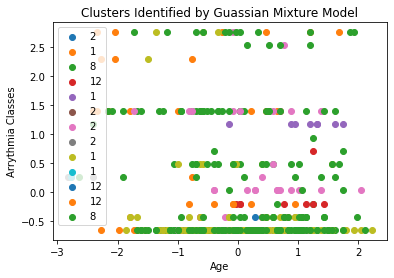

In [31]:
from sklearn.mixture import GaussianMixture
n_clusters = 13
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(scaled_df)
cluster_labels = gmm_model.fit_predict(scaled_df)
dfc=scaled_df
dfc['cluster']= cluster_labels
for k in range(0,n_clusters):
    data =dfc[dfc['cluster']==k]
    plt.scatter(data[0],data[278])
plt.title("Clusters Identified by Guassian Mixture Model")    
plt.ylabel("Arrythmia Classes")
plt.xlabel("Age")
plt.legend(cluster_labels)
plt.show()

# Data Preparing using K-folds

I added this step to deal with expected bias

In [32]:
k = 5
kf = KFold(n_splits=k, random_state=None)
X = scaled_df.iloc[:,:-1]
y = df.iloc[:,-1]
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    ss=preprocessing.StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)


# Solving using SVC

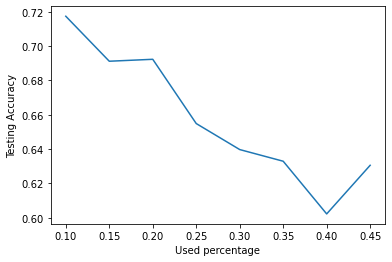

In [33]:
percent= arange(0.1,0.5,0.05)
scores=[]
for p in percent:
    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=1)
    ss=preprocessing.StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)
    SVM = SVC(kernel='rbf' ,random_state=1,C=10,class_weight='balanced' )
    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(percent, scores)
plt.xlabel('Used percentage')
plt.ylabel('Testing Accuracy')
plt.show()

I will split the data to 25% for testing and 75% to train the data for the SVM algorithm

In [34]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
ss=preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


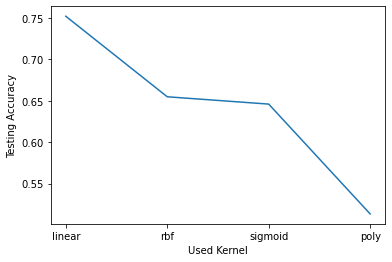

In [35]:
SVMKernel = ['linear','rbf','sigmoid','poly']
scores = []
for k in SVMKernel:
    SVM = SVC(kernel=k ,random_state=1,C=10,class_weight='balanced'  )
    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(SVMKernel, scores)
plt.xlabel('Used Kernel')
plt.ylabel('Testing Accuracy')
plt.show()

I will choose the linear kernel because it achieved the highest score

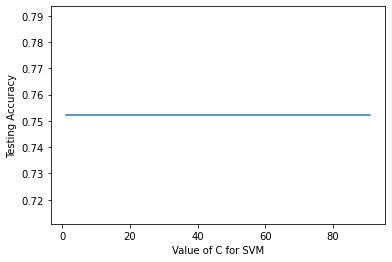

In [36]:
C = arange(1,100,10)
scores = []
for c in C:
    SVM = SVC(kernel='linear',C=c ,random_state=1,class_weight='balanced')
    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(C, scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Testing Accuracy')
plt.show()

In [37]:
SVM = SVC(kernel='linear' ,random_state=10,C=10, class_weight='balanced'  )
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

In [38]:
print("Accuracy on training set: {:.3f}".format(SVM.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(SVM.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.752


C:\Users\hp\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


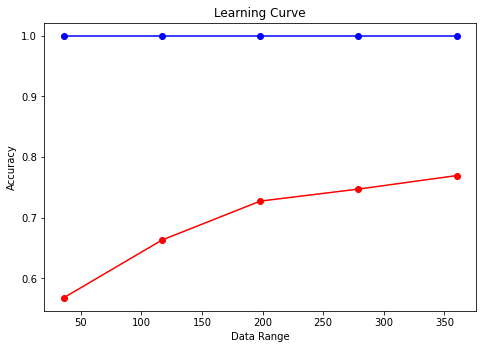

In [39]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(SVM, X, y,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [40]:
y_pred = SVM.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           1       0.81      0.98      0.89        52
           2       0.78      0.44      0.56        16
           3       0.80      0.80      0.80         5
           4       0.75      0.60      0.67         5
           5       0.25      0.50      0.33         2
           6       0.50      0.60      0.55         5
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.82      0.93      0.87        15
          14       0.00      0.00      0.00         3
          15       0.25      1.00      0.40         1
          16       0.00      0.00      0.00         6

    accuracy                           0.75       113
   macro avg       0.50      0.53      0.48       113
weighted avg       0.71      0.75      0.71       113



In [41]:
mse, bias, var = bias_variance_decomp(SVM, X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 14.961
Bias: 10.514
Variance: 4.447


# Using pipeline on SVC


In [42]:
PP = Pipeline([('scaler', MinMaxScaler()),
               ('svc', SVC(kernel='linear' ,random_state=1,C=10, class_weight='balanced'  ))])
PP.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=10, class_weight='balanced', kernel='linear',
                     random_state=1))])

In [43]:
print("Accuracy on training set: {:.3f}".format(PP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(PP.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.805


C:\Users\hp\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


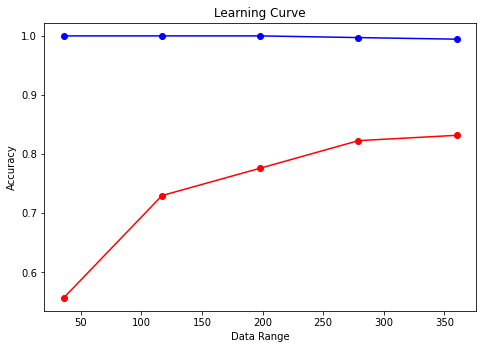

In [44]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(PP, X, y,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [45]:
y_pred = PP.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        52
           2       1.00      0.50      0.67        16
           3       0.80      0.80      0.80         5
           4       0.67      0.40      0.50         5
           5       1.00      0.50      0.67         2
           6       1.00      0.80      0.89         5
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.79      1.00      0.88        15
          14       0.00      0.00      0.00         3
          15       0.50      1.00      0.67         1
          16       0.60      0.50      0.55         6

    accuracy                           0.81       113
   macro avg       0.68      0.58      0.60       113
weighted avg       0.80      0.81      0.78       113



In [46]:
mse, bias, var = bias_variance_decomp(PP, X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 5.054
Bias: 2.699
Variance: 2.355


# Using Logistic regression


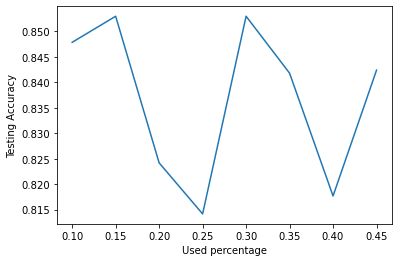

In [47]:
percent= arange(0.1,0.5,0.05)
scores=[]
for p in percent:
    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=1)
    ss=preprocessing.StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)
    lr = LogisticRegression(random_state=1,penalty='l1',solver='liblinear', max_iter=10000,class_weight='balanced')
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))
plt.plot(percent, scores)
plt.xlabel('Used percentage')
plt.ylabel('Testing Accuracy')
plt.show()

I will split the data to 30% for testing and 70% to train the data for the Logistic Regression algorithm

In [48]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
ss=preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


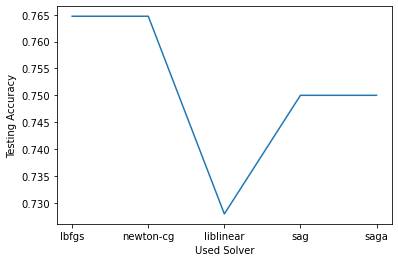

In [49]:
lr_solver = ['lbfgs','newton-cg','liblinear','sag','saga']
scores = []
for l in lr_solver:
    lr = LogisticRegression(random_state=1,solver=l, max_iter=10000,class_weight='balanced')
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))
plt.plot(lr_solver, scores)
plt.xlabel('Used Solver')
plt.ylabel('Testing Accuracy')
plt.show()

I will choose the liblinear solver

In [50]:
lr = LogisticRegression(random_state=1,solver='newton-cg', max_iter=10000, class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=1,
                   solver='newton-cg')

In [51]:
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))
lr_test=lr.score(X_test, y_test)

Accuracy on training set: 0.997
Accuracy on test set: 0.765


C:\Users\hp\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


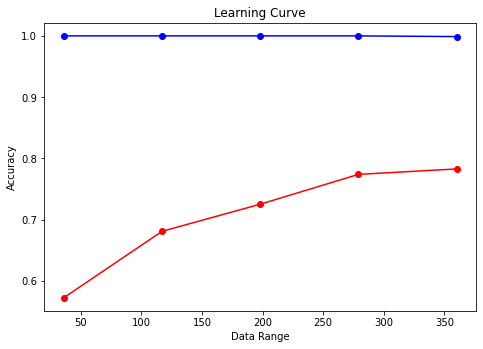

In [52]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(lr, X, y,n_jobs=1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [53]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.84      0.92      0.88        66
           2       0.67      0.47      0.55        17
           3       0.71      1.00      0.83         5
           4       0.67      0.80      0.73         5
           5       0.33      0.33      0.33         3
           6       0.33      0.40      0.36         5
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.89      0.89      0.89        19
          14       0.00      0.00      0.00         3
          15       0.50      1.00      0.67         2
          16       0.60      0.38      0.46         8

    accuracy                           0.76       136
   macro avg       0.55      0.56      0.53       136
weighted avg       0.74      0.76      0.74       136



In [54]:
mse, bias, var = bias_variance_decomp(lr, X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 13.485
Bias: 9.119
Variance: 4.366


# Using Random Forest Classifier


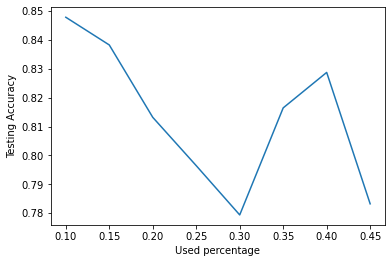

In [55]:
percent= arange(0.1,0.5,0.05)
scores=[]
for p in percent:
    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=1)
    ss=preprocessing.StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.fit_transform(X_test)
    
    rf = RandomForestClassifier(random_state=1, max_depth=6,class_weight='balanced')
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
    
plt.plot(percent, scores)
plt.xlabel('Used percentage')
plt.ylabel('Testing Accuracy')
plt.show()

In [56]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
ss=preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X.shape,y.shape

((451, 279), (451,))

I will split the data 40% for testing and 60% for training the data using Random Forest Classifier Algorithm

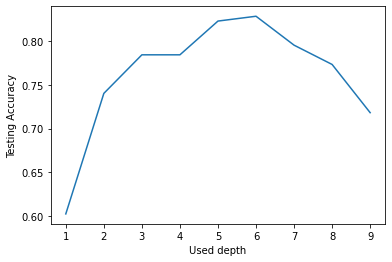

In [57]:
depth= arange(1,10,1)
scores=[]
for d in depth:
   
    rf = RandomForestClassifier(random_state=1, max_depth=d,class_weight='balanced')
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))
    
plt.plot(depth, scores)
plt.xlabel('Used depth')
plt.ylabel('Testing Accuracy')
plt.show()

I will choose the depth to be equal to 6

In [58]:
rf = RandomForestClassifier(random_state=1, max_depth=6,class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=1)

In [59]:
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))


Accuracy on training set: 0.993
Accuracy on test set: 0.829


C:\Users\hp\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


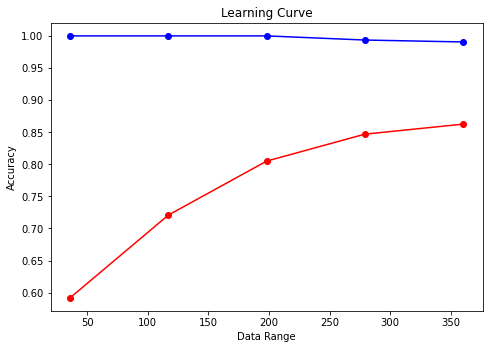

In [60]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(rf, X, y,n_jobs=1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [61]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.87      0.98      0.92        88
           2       0.70      0.76      0.73        21
           3       0.75      0.86      0.80         7
           4       0.88      1.00      0.93         7
           5       1.00      0.43      0.60         7
           6       0.88      0.78      0.82         9
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         3
          10       0.77      0.77      0.77        22
          14       0.00      0.00      0.00         3
          15       0.67      1.00      0.80         2
          16       1.00      0.27      0.43        11

    accuracy                           0.83       181
   macro avg       0.65      0.60      0.60       181
weighted avg       0.83      0.83      0.81       181



In [62]:
mse, bias, var = bias_variance_decomp(rf, X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 15.672
Bias: 11.334
Variance: 4.337


# Comparing the accuracy of all the 4 models

In [63]:
scores = [rf.score(X_train, y_train),lr.score(X_train, y_train),SVM.score(X_train, y_train),PP.score(X_train, y_train)]
algorithms = ["Random Forest","Logestic regression","SVM","SVM-PP"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 0.8814814814814815 %
The accuracy score achieved using Logestic regression is: 0.9185185185185185 %
The accuracy score achieved using SVM is: 0.9185185185185185 %
The accuracy score achieved using SVM-PP is: 0.9296296296296296 %


C:\Users\hp\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Training score'}, xlabel='Algorithms', ylabel='Accuracy of train score'>

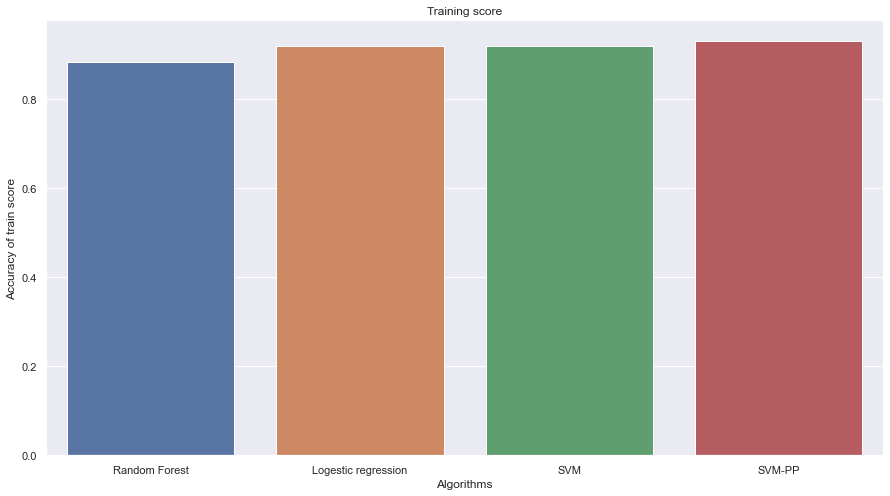

In [64]:
#display bar plot for each accuracy
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy of train score")
plt.title('Training score')
sns.barplot(algorithms,scores)

In [65]:
scores = [rf.score(X_test, y_test),lr.score(X_test, y_test),SVM.score(X_test, y_test),PP.score(X_test, y_test)]
algorithms = ["Random Forest","Logestic regression","SVM","SVM-PP"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 0.7237569060773481 %
The accuracy score achieved using Logestic regression is: 0.7900552486187845 %
The accuracy score achieved using SVM is: 0.7569060773480663 %
The accuracy score achieved using SVM-PP is: 0.8176795580110497 %


C:\Users\hp\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Testing score'}, xlabel='Algorithms', ylabel='Accuracy of train score'>

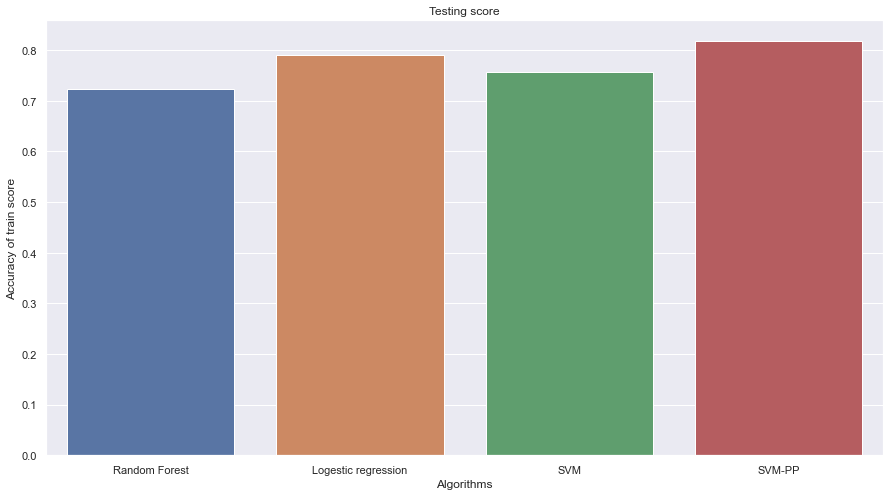

In [66]:
#display bar plot for each accuracy
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy of train score")
plt.title('Testing score')
sns.barplot(algorithms,scores)